# Taller 2 - SVM
Catalina Polo

Ricardo Hurtado

## 1. Preparación de la base de datos

In [2]:
import pandas as pd

# Importar datos
df = pd.read_csv('/content/titanic.csv')

print("Dataset cargado exitosamente. Primeras 5 filas:")
display(df.head())

Dataset cargado exitosamente. Primeras 5 filas:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Variables numéricas
numeric_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
target_variable = 'Survived' # Variable target

# Creamos una base de datos que solo tenga lo que necesitamos
df_cleaned = df[numeric_features + [target_variable]].copy()
df_cleaned.dropna(inplace=True)

display(df_cleaned.head())

,Age,Fare,Pclass,SibSp,Parch,Survived
0,22.0,7.2500,3,1,0,0
1,38.0,71.2833,1,1,0,1
2,26.0,7.9250,3,0,0,1
3,35.0,53.1000,1,1,0,1
4,35.0,8.0500,3,0,0,0


In [4]:
#Separar las columnas de train y test

from sklearn.model_selection import train_test_split

X = df_cleaned[numeric_features]
y = df_cleaned[target_variable]

# (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

print("Primeras 5 filas de X_train:")
display(X_train.head())

Dimensiones de X_train: (571, 5)
Dimensiones de X_test: (143, 5)
Dimensiones de y_train: (571,)
Dimensiones de y_test: (143,)
Primeras 5 filas de X_train:


,Age,Fare,Pclass,SibSp,Parch
619,26.0,10.5000,2,0,0
622,20.0,15.7417,3,1,1
72,21.0,73.5000,2,0,0
339,45.0,35.5000,1,0,0
513,54.0,59.4000,1,1,0


## 2. Intuición Visual: El Hiperplano y el Margen

In [5]:
# Base de datos temporal con "Age" y "Fare"
X_temp = X_train[['Age', 'Fare']]
y_temp = y_train

print("(X_temp):")
display(X_temp.head())
print("(y_temp):")
display(y_temp.head())

(X_temp):


,Age,Fare
619,26.0,10.5000
622,20.0,15.7417
72,21.0,73.5000
339,45.0,35.5000
513,54.0,59.4000


(y_temp):


,Survived
619,0
622,1
72,0
339,0
513,1


In [6]:
from sklearn.svm import SVC

# Entrenar un modelo SVC con kernel lineal
svc_linear = SVC(kernel='linear', random_state=42)
svc_linear.fit(X_temp, y_temp)

print("si se logró :P")

si se logró :P


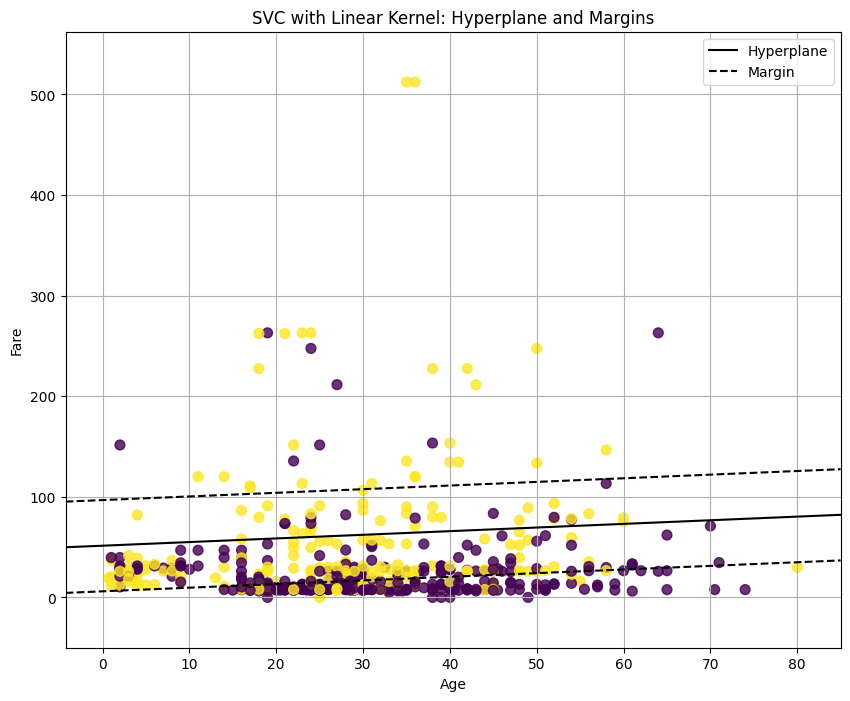

In [7]:
#Gráfico de dispersión

import matplotlib.pyplot as plt
import numpy as np

#Creamos la figura
plt.figure(figsize=(10, 8))

# Puntos de los datos
plt.scatter(X_temp['Age'], X_temp['Fare'], c=y_temp, cmap='viridis', s=50, alpha=0.8)

#Parámetro del modelo
w = svc_linear.coef_[0] #Pendiente
b = svc_linear.intercept_[0] #Intercepto

#Parte gráfica
x_min, x_max = X_temp['Age'].min() - 5, X_temp['Age'].max() + 5
y_min, y_max = X_temp['Fare'].min() - 50, X_temp['Fare'].max() + 50

# Calculo de la recta (hiperplano)
xx = np.linspace(x_min, x_max)
yy = (-w[0] * xx - b) / w[1]

# Gráfico
plt.plot(xx, yy, 'k-', label='Hyperplane')

margin = 1 / np.linalg.norm(w)
yy_down = yy - np.sqrt(margin**2 / (1 + (w[0]/w[1])**2))
yy_up = yy + np.sqrt(margin**2 / (1 + (w[0]/w[1])**2))

plt.plot(xx, yy_down, 'k--', label='Margin')
plt.plot(xx, yy_up, 'k--')

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('SVC with Linear Kernel: Hyperplane and Margins')
plt.legend()
plt.grid(True)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

El modelo intenta separarlo pero una línea recta no puede diferenciar los datos. Visualmente podemos ver que el conjunto de datos no se puede separar con una recta.

## Impacto del parametro C en SVM

El parámetro C controla el equilibrio entre maximizar el margen y minizar el error de clasificación

In [8]:
#Entrenar con dos modelos de kernel lineal

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Modelo A (C=0.01)
svc_model_A = SVC(kernel='linear', C=0.01, random_state=42)
svc_model_A.fit(X_train, y_train)

# Modelo B (C=1000)
svc_model_B = SVC(kernel='linear', C=1000, random_state=42)
svc_model_B.fit(X_train, y_train)

print("Existos totales :P")

Existos totales :P


(Se demora como 3 minutos en cargar)

In [9]:
#Accuracy de los modelos
# Para Modelo A
y_train_pred_A = svc_model_A.predict(X_train)
y_test_pred_A = svc_model_A.predict(X_test)

accuracy_train_A = accuracy_score(y_train, y_train_pred_A)
accuracy_test_A = accuracy_score(y_test, y_test_pred_A)

print(f"Modelo A - Accuracy en Entrenamiento: {accuracy_train_A:.4f}")
print(f"Modelo A - Accuracy en Prueba:{accuracy_test_A:.4f}")

print("\n" + "-"*50 + "\n")

# Para Modelo B
y_train_pred_B = svc_model_B.predict(X_train)
y_test_pred_B = svc_model_B.predict(X_test)

accuracy_train_B = accuracy_score(y_train, y_train_pred_B)
accuracy_test_B = accuracy_score(y_test, y_test_pred_B)

print(f"Modelo B - Accuracy en Entrenamiento: {accuracy_train_B:.4f}")
print(f"Modelo B - Accuracy en Prueba:     {accuracy_test_B:.4f}")

Modelo A - Accuracy en Entrenamiento: 0.6935
Modelo A - Accuracy en Prueba:0.6923

--------------------------------------------------

Modelo B - Accuracy en Entrenamiento: 0.7285
Modelo B - Accuracy en Prueba:     0.6993


### 3.3 Análisis

Observamos que el modelo B (C=1000) obtiene un mayor accuracy en el conjunto de entrenamiento en comparación con el modelo A (C=0.01). Esto indica que un valor alto de C penaliza más los errores y genera un margen más rígido, ajustándose mejor a los datos de entrenamiento.

Sin embargo, al evaluar el desempeño en el conjunto de prueba, la diferencia entre ambos modelos no es considerable. Aunque el modelo B mantiene un rendimiento ligeramente superior, la brecha entre accuracy de entrenamiento y prueba no es lo suficientemente grande como para evidenciar un sobreajuste severo.

Por otro lado, el modelo A presenta resultados muy similares entre entrenamiento y prueba, lo que sugiere una mejor capacidad de generalización debido a su margen más amplio y tolerancia al error. Podemos concluir que mientras el modelo B logra mayor ajuste, el modelo A es mas confiable  frente a datos no vistos.


## 4. El "Truco del Kernel" y Optimización

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the SVM classifier
svm_classifier = SVC(random_state=42)

# Define the parameter grid
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10],
     'gamma': ['scale', 'auto', 0.1]},
    {'kernel': ['poly'], 'C': [0.1],
     'gamma': ['scale', 'auto']} # hacer poli con 1 en lugar de 0.1 puede demorar mas de una hora en el entorno colab, no lo veo rentable. Más riesgo de overfitting, Más costo computacional
]

# Initialize GridSearchCV
grid_search = GridSearchCV(svm_classifier, param_grid, cv=2, scoring='accuracy', n_jobs=1, verbose=3) #cv alto mas recursos computacionales

# Fit GridSearchCV to the training data
print("Iniciando GridSearchCV. Esto puede tomar un tiempo...")
grid_search.fit(X_train, y_train)
print("GridSearchCV completado.")

Iniciando GridSearchCV. Esto puede tomar un tiempo...
Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2] END ..............C=0.1, kernel=linear;, score=0.661 total time=   0.0s
[CV 2/2] END ..............C=0.1, kernel=linear;, score=0.719 total time=   0.0s
[CV 1/2] END ................C=1, kernel=linear;, score=0.664 total time=   2.7s
[CV 2/2] END ................C=1, kernel=linear;, score=0.712 total time=   0.1s
[CV 1/2] END ...............C=10, kernel=linear;, score=0.664 total time=   9.2s
[CV 2/2] END ...............C=10, kernel=linear;, score=0.709 total time=   0.8s
[CV 1/2] END ..............C=100, kernel=linear;, score=0.661 total time=   6.8s
[CV 2/2] END ..............C=100, kernel=linear;, score=0.726 total time=   8.2s
[CV 1/2] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.671 total time=   0.0s
[CV 2/2] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.674 total time=   0.0s
[CV 1/2] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.594 total time=  

In [11]:
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
print(f"Mejor score (accuracy) encontrado: {grid_search.best_score_:.4f}")

Mejores parámetros encontrados: {'C': 100, 'kernel': 'linear'}
Mejor score (accuracy) encontrado: 0.6936


Se ejecutó el proceso de optimización de hiperparámetros mediante GridSearchCV, empleando validación cruzada de 2 particiones (2-fold cross-validation). En total se evaluaron 16 combinaciones de hiperparámetros, lo que derivó en 32 entrenamientos del modelo (fits).

Para el kernel lineal, los resultados muestran un desempeño estable entre los distintos valores de C evaluados (0.1, 1, 10 y 100). Los valores de accuracy oscilaron aproximadamente entre 0.661 y 0.726. Se observa que el incremento de C no generó mejoras sustanciales en el desempeño, lo que sugiere que el problema presenta una separabilidad aproximadamente lineal y que aumentar la penalización por error no aporta beneficios significativos en la generalización.

En el caso del kernel RBF, los resultados dependieron fuertemente del parámetro gamma. Las combinaciones con gamma = scale presentaron los mejores desempeños dentro de este kernel, alcanzando accuracies cercanos a 0.67. Por el contrario, valores como gamma = auto o gamma = 0.1 mostraron reducciones notables en el rendimiento, con métricas alrededor de 0.59 – 0.65. Esto indica que una mala calibración de la influencia radial puede llevar al modelo a subajustar o sobreajustar los datos.

Respecto al kernel polinomial, las primeras ejecuciones evidencian un desempeño inferior en comparación con los kernels lineal y RBF, con accuracies cercanos a 0.60 – 0.63. Esto sugiere que la transformación polinómica no logra modelar mejor la frontera de decisión para este conjunto de datos, además de implicar un mayor costo computacional sin mejoras claras en la capacidad predictiva.

En términos generales, el análisis preliminar de los resultados indica que los mejores desempeños se concentran en el kernel lineal y en algunas configuraciones del kernel RBF, mientras que el kernel polinomial presenta un rendimiento menor y menos estable.

## 5.Comparación y Despliegue

In [ ]:
!pip install gradio

In [22]:
import numpy as np

def predict_survival(pclass, sex, age, fare):

    # Codificación de sexo (ajusta según tu preprocesamiento)
    sex = 1 if sex == "Male" else 0

    # Crear arreglo
    data = np.array([[pclass, sex, age, fare]])

    prediction = best_model.predict(data)[0]

    if prediction == 1:
        return "Sobrevive"
    else:
        return "No Sobrevive"


In [24]:
import gradio as gr

interface = gr.Interface(

    fn=predict_survival,

    inputs=[
        gr.Number(label="Clase (1, 2, 3)"),
        gr.Radio(["Male", "Female"], label="Sex"),
        gr.Number(label="Age"),
        gr.Number(label="Fare")
    ],

    outputs="text",

    title="Predicción de Supervivencia - Titanic",
    description="Ingrese los datos del pasajero para predecir si sobrevive."
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bd99bcccb3105206ca.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


##